# Data Cleaning, EDA, and Preprocessing

### Imports 

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

_____________________________
## Combining NFL CSV Files into a Dataframe

In order to analyze our data from each subreddit as a whole, we need to combine the individual csv dataframes that we pulled using the scraper() function.

In [2]:
# creating a list of all of the csv files from our nfl subreddit

nfl_csvs = ['./../data/nfl_aug_2nd.csv', './../data/nfl_aug_7.csv', './../data/nfl_aug_8.csv', './../data/nfl_aug_9_new_tab.csv', 
            './../data/nfl_aug_10_new_tab.csv', './../data/nfl_aug_10_hot_tab.csv', './../data/nfl_aug_10_top_tab.csv', 
            './../data/nfl_aug_13_new_tab.csv']

# creating a for loop to loop through all of the files in nfl_csvs, reading them in, and appending them to a new list: nfl_dfs

nfl_dfs = []

for nfl_file in nfl_csvs:
    df = pd.read_csv(nfl_file)
    nfl_dfs.append(df)

In [3]:
# concatenating the datasets on top of each other so that we have one large dataframe

combined_nfl_df = pd.concat(nfl_dfs, ignore_index = True)

In [4]:
# making sure the above few cells worked

combined_nfl_df.head()

,Unnamed: 0,title,subreddit,selftext,subreddit_id,name,upvote_ratio,media,is_video,created_utc
0,0,2023 Offseason Review: Minnesota Vikings,nfl,# [Series Hub](https://www.reddit.com/r/nfl/co...,t5_2qmg3,NaN,NaN,NaN,NaN,NaN
1,1,2023 Offseason Review: San Francisco 49ers,nfl,#San Francisco 49ers Offseason Review\n\n##[Se...,t5_2qmg3,NaN,NaN,NaN,NaN,NaN
2,2,Tua Tagovailoa says everything he did this off...,nfl,&gt;Tagovailoa also talked about choosing a ne...,t5_2qmg3,NaN,NaN,NaN,NaN,NaN
3,3,[Glaser] “Zach Wilson has played really well i...,nfl,NaN,t5_2qmg3,NaN,NaN,NaN,NaN,NaN
4,4,[JacobWestendorf] #Broncos RB Terrell Davis pl...,nfl,NaN,t5_2qmg3,NaN,NaN,NaN,NaN,NaN


In [5]:
# checking the shape of the new dataframe

combined_nfl_df.shape

(6735, 10)

In [6]:
# seeing how many observations within the new dataframe are unique

combined_nfl_df['title'].nunique()

1272

In [7]:
# dropping all duplicated observations

combined_nfl_df = combined_nfl_df.drop_duplicates(subset = 'title')

In [8]:
# checking shape after previous cell

combined_nfl_df.shape

(1272, 10)

In [9]:
# checking to see how many null values we have in our new dataframe

combined_nfl_df.isnull().sum()

Unnamed: 0         0
title              0
subreddit          0
selftext        1048
subreddit_id       0
name             100
upvote_ratio     351
media            810
is_video         351
created_utc      351
dtype: int64

In [10]:
# filling the null values within our dataframe with an empty string - since we end up dropping every feature below `subreddit_id` below, 
# this code will only have an effect on the null values in `selftext` 
# I chose to fill the null values in `selftext` because I am projecting that the majority of those observations don't have any self text, and only have a title, based on observing the subreddit

combined_nfl_df.fillna('', inplace = True)

In [11]:
combined_nfl_df.isnull().sum()

Unnamed: 0      0
title           0
subreddit       0
selftext        0
subreddit_id    0
name            0
upvote_ratio    0
media           0
is_video        0
created_utc     0
dtype: int64

In [12]:
# dropping the below columns because some of the csv files have the below columns as features, and some did not, so those columns were incomplete

combined_nfl_df = combined_nfl_df.drop(columns = ['Unnamed: 0', 'name', 'upvote_ratio', 'media', 'is_video', 'created_utc'])

In [13]:
# checking to see if the above few cells worked

combined_nfl_df.head()

,title,subreddit,selftext,subreddit_id
0,2023 Offseason Review: Minnesota Vikings,nfl,# [Series Hub](https://www.reddit.com/r/nfl/co...,t5_2qmg3
1,2023 Offseason Review: San Francisco 49ers,nfl,#San Francisco 49ers Offseason Review\n\n##[Se...,t5_2qmg3
2,Tua Tagovailoa says everything he did this off...,nfl,&gt;Tagovailoa also talked about choosing a ne...,t5_2qmg3
3,[Glaser] “Zach Wilson has played really well i...,nfl,,t5_2qmg3
4,[JacobWestendorf] #Broncos RB Terrell Davis pl...,nfl,,t5_2qmg3


### Saving new combined NFL dataframe

In [14]:
# saving the new dataframe to a csv after data cleaning

combined_nfl_df.to_csv('./../data/combined_nfl_df.csv', index = False)

## Combining NBA CSV Files into a Dataframe

The cells within this section are performing the exact same function on the data from the NBA subreddit as they did above for the NFL data. Please see comments within the cells in the above section if explanation for each cell is needed.

In [15]:
nba_csvs = ['./../data/nba_aug_2nd.csv', './../data/nba_aug_7.csv', './../data/nba_aug_9_new_tab.csv', 
            './../data/nba_aug_10_new_tab.csv','./../data/nba_aug_13_new_tab.csv']

In [16]:
nba_dfs = []

for nba_file in nba_csvs:
    df = pd.read_csv(nba_file)
    nba_dfs.append(df)

In [17]:
combined_nba_df = pd.concat(nba_dfs, ignore_index = True)

In [18]:
combined_nba_df.head()

,Unnamed: 0,title,subreddit,selftext,subreddit_id,name,upvote_ratio,media,is_video,created_utc
0,0,2023-24 NBA Free Agent Tracker,nba,Very basic tool I made. Hope this helps and fe...,t5_2qo4s,NaN,NaN,NaN,NaN,NaN
1,1,[Larry Nance Jr.] So the @OrlandoMagic who hav...,nba,[Tweet](https://twitter.com/larrydn22/status/1...,t5_2qo4s,NaN,NaN,NaN,NaN,NaN
2,2,Cooper Flagg was allegedly “cooking” Bradley B...,nba,“I heard that my boy Cooper Flagg was at Jayso...,t5_2qo4s,NaN,NaN,NaN,NaN,NaN
3,3,Which players legacy is most impacted if their...,nba,"Off-season post obviously, some I thought of:\...",t5_2qo4s,NaN,NaN,NaN,NaN,NaN
4,4,[Charania] A month after Damian Lillard reques...,nba,&gt;There remains no shift in Lillard’s mindse...,t5_2qo4s,NaN,NaN,NaN,NaN,NaN


In [19]:
combined_nba_df.shape

(4955, 10)

In [20]:
combined_nba_df['title'].nunique()

1420

In [21]:
combined_nba_df = combined_nba_df.drop(columns = ['Unnamed: 0', 'name', 'upvote_ratio', 'media', 'is_video', 'created_utc'])

In [22]:
combined_nba_df.head()

,title,subreddit,selftext,subreddit_id
0,2023-24 NBA Free Agent Tracker,nba,Very basic tool I made. Hope this helps and fe...,t5_2qo4s
1,[Larry Nance Jr.] So the @OrlandoMagic who hav...,nba,[Tweet](https://twitter.com/larrydn22/status/1...,t5_2qo4s
2,Cooper Flagg was allegedly “cooking” Bradley B...,nba,“I heard that my boy Cooper Flagg was at Jayso...,t5_2qo4s
3,Which players legacy is most impacted if their...,nba,"Off-season post obviously, some I thought of:\...",t5_2qo4s
4,[Charania] A month after Damian Lillard reques...,nba,&gt;There remains no shift in Lillard’s mindse...,t5_2qo4s


In [23]:
combined_nba_df.isnull().sum()

title              0
subreddit          0
selftext        2277
subreddit_id       0
dtype: int64

In [24]:
combined_nba_df.fillna('', inplace = True)

In [25]:
combined_nba_df.isnull().sum()

title           0
subreddit       0
selftext        0
subreddit_id    0
dtype: int64

In [26]:
combined_nba_df = combined_nba_df.drop_duplicates(subset = 'title')

In [27]:
combined_nba_df.shape

(1420, 4)

### Saving new combined NBA dataframe

In [28]:
combined_nba_df.to_csv('./../data/combined_nba_df.csv', index = False)

___________________
## Finding text length and word count in posts within each subreddit

In [29]:
# Creating new features using list comprehension to find text length in 'selftext' feature

combined_nfl_df['text_length'] = [len(i) for i in combined_nfl_df['selftext']]
combined_nba_df['text_length'] = [len(i) for i in combined_nba_df['selftext']]

In [30]:
# Creating new features list comprehension to find word count in 'selftext' feature

combined_nfl_df['word_count'] = [len(i.split(' ')) for i in combined_nfl_df['selftext']]
combined_nba_df['word_count'] = [len(i.split(' ')) for i in combined_nba_df['selftext']]

In [31]:
# Confirming that the above cells worked

combined_nfl_df.head()

,title,subreddit,selftext,subreddit_id,text_length,word_count
0,2023 Offseason Review: Minnesota Vikings,nfl,# [Series Hub](https://www.reddit.com/r/nfl/co...,t5_2qmg3,12954,1676
1,2023 Offseason Review: San Francisco 49ers,nfl,#San Francisco 49ers Offseason Review\n\n##[Se...,t5_2qmg3,39725,6053
2,Tua Tagovailoa says everything he did this off...,nfl,&gt;Tagovailoa also talked about choosing a ne...,t5_2qmg3,249,43
3,[Glaser] “Zach Wilson has played really well i...,nfl,,t5_2qmg3,0,1
4,[JacobWestendorf] #Broncos RB Terrell Davis pl...,nfl,,t5_2qmg3,0,1


In [32]:
# Confirming that the above cells worked

combined_nba_df.head()

,title,subreddit,selftext,subreddit_id,text_length,word_count
0,2023-24 NBA Free Agent Tracker,nba,Very basic tool I made. Hope this helps and fe...,t5_2qo4s,24012,1580
1,[Larry Nance Jr.] So the @OrlandoMagic who hav...,nba,[Tweet](https://twitter.com/larrydn22/status/1...,t5_2qo4s,304,38
2,Cooper Flagg was allegedly “cooking” Bradley B...,nba,“I heard that my boy Cooper Flagg was at Jayso...,t5_2qo4s,453,87
3,Which players legacy is most impacted if their...,nba,"Off-season post obviously, some I thought of:\...",t5_2qo4s,650,123
4,[Charania] A month after Damian Lillard reques...,nba,&gt;There remains no shift in Lillard’s mindse...,t5_2qo4s,785,117


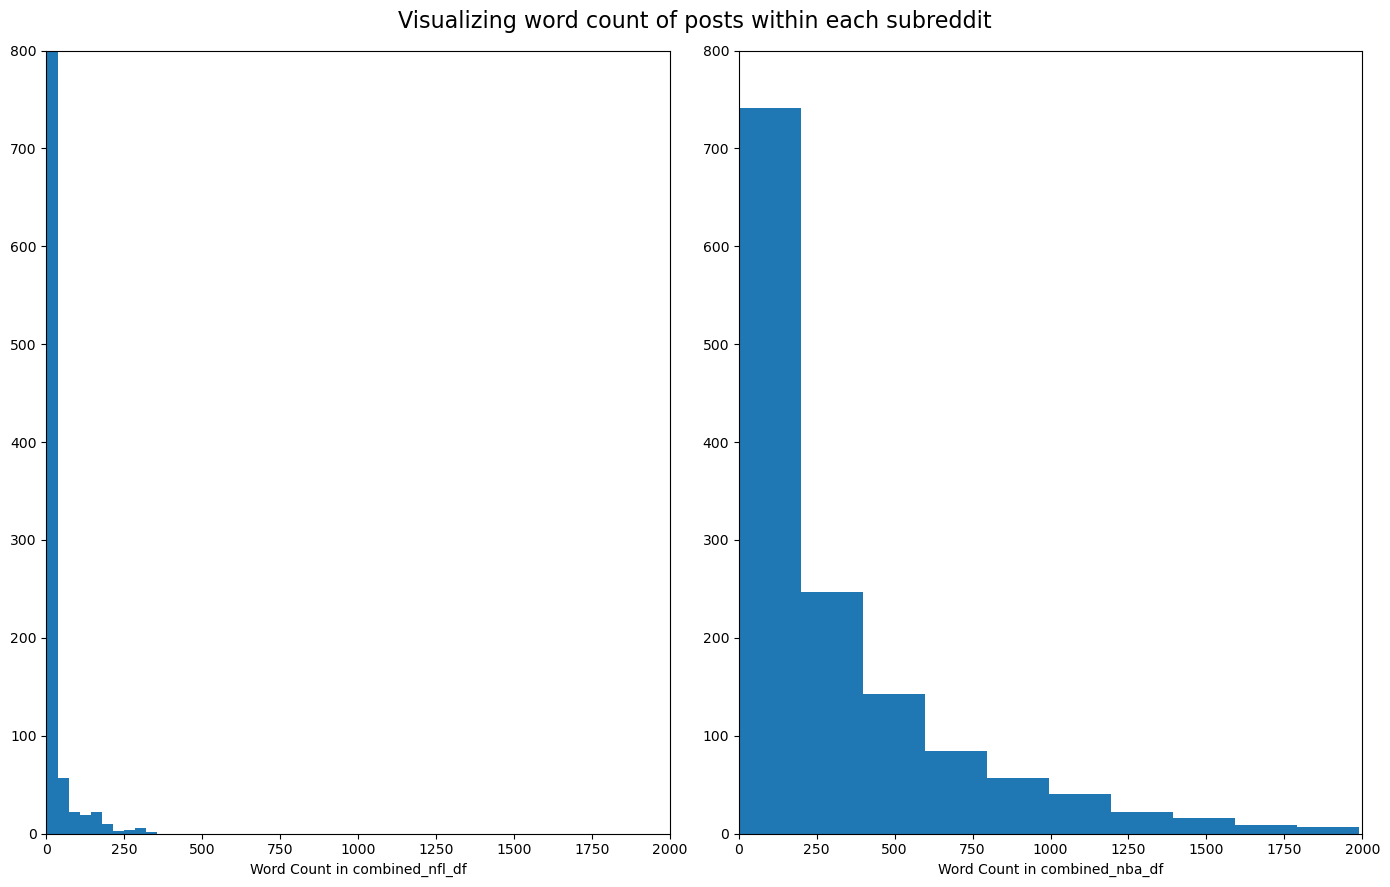

In [108]:
# Plotting 'text_length' and 'word count' features

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,9))
fig.suptitle('Visualizing word count of posts within each subreddit', fontsize=16)
xmax = 2000
ymax = 800
ax0.set_xlim(0, xmax)
ax0.set_ylim(0, ymax)
ax1.set_xlim(0, xmax)
ax1.set_ylim(0, ymax)

ax0.hist(combined_nfl_df['word_count'][combined_nfl_df['text_length'] < 2000])
ax0.set_xlabel('Word Count in combined_nfl_df', fontsize=10)

ax1.hist(combined_nba_df['text_length'][combined_nba_df['text_length'] < 2000])
ax1.set_xlabel('Word Count in combined_nba_df', fontsize=10);

plt.tight_layout()
plt.savefig('./../images/word_count_each_subreddit.png');

In [34]:
# getting summary statistics for 'text_length' feature on combined_nfl_df

combined_nfl_df['text_length'].describe()

count     1272.000000
mean       432.936321
std       2853.706243
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      39725.000000
Name: text_length, dtype: float64

In [35]:
# Finding value_counts for 'text_length' feature on combined_nfl_df

combined_nfl_df['text_length'].value_counts()

0       1048
855        6
551        4
533        4
530        3
        ... 
1272       1
536        1
186        1
1643       1
24         1
Name: text_length, Length: 196, dtype: int64

In [36]:
# getting summary statistics for 'text_length' feature on combined_nba_df

combined_nba_df['text_length'].describe()

count     1420.000000
mean       508.373944
std       1528.502411
min          0.000000
25%          0.000000
50%        175.500000
75%        482.000000
max      24169.000000
Name: text_length, dtype: float64

In [37]:
# Finding value_counts for 'text_length' feature on combined_nba_df

combined_nba_df['text_length'].value_counts()

0       595
162       6
163       5
116       5
327       5
       ... 
1216      1
346       1
1203      1
463       1
133       1
Name: text_length, Length: 589, dtype: int64

__________________________________
## Count Vectorization

Now that we have cleaned dataframes for both the data from the NFL and NBA subreddits, let's perform some EDA to explore what parameters might be best for our modeling in the modeling notebook. We will start by performing count vectorization, to transform our text into vectors so that we can continue with EDA, and model this text data.

### combined_nfl_df:

In [38]:
# combining `title` feature with `selftext` feature so that we have more text to examine

combined_nfl_df['title_plus_selftext'] = combined_nfl_df['title'] + combined_nfl_df['selftext']

combined_nfl_df.head()

,title,subreddit,selftext,subreddit_id,text_length,word_count,title_plus_selftext
0,2023 Offseason Review: Minnesota Vikings,nfl,# [Series Hub](https://www.reddit.com/r/nfl/co...,t5_2qmg3,12954,1676,2023 Offseason Review: Minnesota Vikings# [Ser...
1,2023 Offseason Review: San Francisco 49ers,nfl,#San Francisco 49ers Offseason Review\n\n##[Se...,t5_2qmg3,39725,6053,2023 Offseason Review: San Francisco 49ers#San...
2,Tua Tagovailoa says everything he did this off...,nfl,&gt;Tagovailoa also talked about choosing a ne...,t5_2qmg3,249,43,Tua Tagovailoa says everything he did this off...
3,[Glaser] “Zach Wilson has played really well i...,nfl,,t5_2qmg3,0,1,[Glaser] “Zach Wilson has played really well i...
4,[JacobWestendorf] #Broncos RB Terrell Davis pl...,nfl,,t5_2qmg3,0,1,[JacobWestendorf] #Broncos RB Terrell Davis pl...


In [39]:
# Setting up our X and y for combined_nfl_df

nfl_X = combined_nfl_df['title_plus_selftext']
nfl_y = combined_nfl_df['subreddit']

In [40]:
# Checking our baseline

nfl_y.value_counts(normalize= True)

nfl    1.0
Name: subreddit, dtype: float64

In [41]:
# splitting our data into training and testing sets

X_train_nfl, X_test_nfl, y_train_nfl, y_test_nfl = train_test_split(nfl_X, nfl_y, stratify = nfl_y, random_state= 42)

In [42]:
#Instantiating CountVectorizer

cvec_nfl = CountVectorizer(stop_words= 'english')

In [43]:
# Fitting the vectorizer on our corpus

cvec_nfl.fit(X_train_nfl)

CountVectorizer(stop_words='english')

In [44]:
# Transforming our X_train corpus

X_train_nfl = cvec_nfl.transform(X_train_nfl)

In [45]:
# checking the shape of our transformed corpus

X_train_nfl.shape

(954, 8143)

In [46]:
# convert training data to dataframe

X_train_nfl_df = pd.DataFrame(X_train_nfl.todense(), 
                          columns=cvec_nfl.get_feature_names_out())

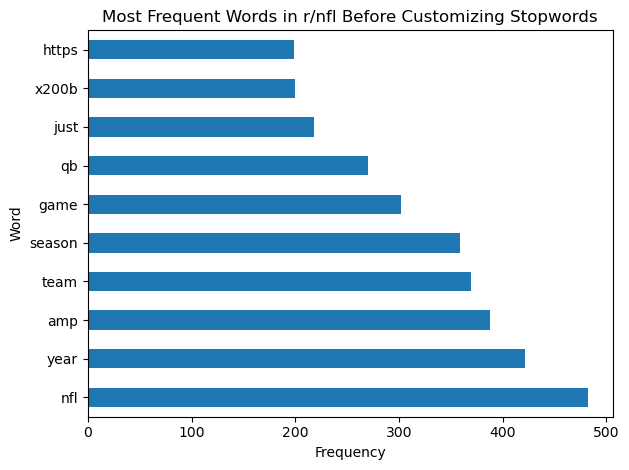

In [110]:
# plotting top occuring words

X_train_nfl_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Frequent Words in r/nfl Before Customizing Stopwords');

plt.tight_layout()
plt.savefig('./../images/rnfl_high_frequency_words_pre_stopword_cleaning.png');

In [48]:
# print(CountVectorizer(stop_words = 'english').get_stop_words())

### Count vectorizing on combined_nfl_data with added stop words

Some of the top occuring words displayed above, such as and https, seem to not have much significance when it comes to the topics I am analyzing(NFL and NBA). In the section below, I will add any words that seem to be nonsensical to my list of stop words when I instantiate the count vectorizer.

In [49]:
# Setting up our X and y for combined_nfl_df

nfl_X2 = combined_nfl_df['title_plus_selftext']
nfl_y2 = combined_nfl_df['subreddit']

In [50]:
# splitting our data into training and testing sets

X_train_nfl2, X_test_nfl2, y_train_nfl2, y_test_nfl2 = train_test_split(nfl_X2, nfl_y2, stratify = nfl_y2, random_state= 42)

In [51]:
#Instantiating CountVectorizer and adding in additional stop words 

default_stop_words = CountVectorizer(stop_words='english').get_stop_words()

custom_stop_words = ['like', 'nfl', 'https']

cvec_nfl2_stop_words = list(default_stop_words) + custom_stop_words

cvec_nfl2 = CountVectorizer(stop_words= cvec_nfl2_stop_words)

In [52]:
# Fitting the vectorizer on my corpus

cvec_nfl2.fit(X_train_nfl2)

CountVectorizer(stop_words=['she', 'with', 'you', 'otherwise', 'they', 'almost',
                            'whence', 'although', 'get', 'nevertheless',
                            'alone', 'eleven', 'both', 'indeed', 'every', 'had',
                            'that', 'whereafter', 'first', 'already', 'through',
                            'yet', 'put', 'others', 'ten', 'whoever', 'often',
                            'while', 'will', 'whose', ...])

In [53]:
# Transforming our X_train corpus

X_train_nfl2 = cvec_nfl2.transform(X_train_nfl2)

In [54]:
# checking the shape of our transformed corpus

X_train_nfl2.shape

(954, 8140)

In [55]:
# convert training data to dataframe

X_train_nfl_df2 = pd.DataFrame(X_train_nfl2.todense(), 
                          columns=cvec_nfl2.get_feature_names_out())

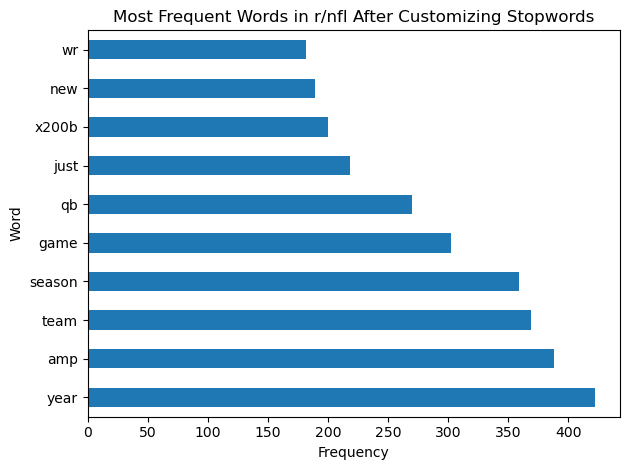

In [111]:
# plotting top occuring words

X_train_nfl_df2.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Frequent Words in r/nfl After Customizing Stopwords');

plt.tight_layout()
plt.savefig('./../images/rnfl_high_frequency_words_post_stopword_cleaning.png');

### combined_nba_df:

The cells within this section are performing the exact same function on the data from the NBA subreddit as they did above for the NFL data. Please see comments within the cells in the above section if explanation for each cell is needed.

In [57]:
combined_nba_df['title_plus_selftext'] = combined_nba_df['title'] + combined_nba_df['selftext']

combined_nba_df.head()

,title,subreddit,selftext,subreddit_id,text_length,word_count,title_plus_selftext
0,2023-24 NBA Free Agent Tracker,nba,Very basic tool I made. Hope this helps and fe...,t5_2qo4s,24012,1580,2023-24 NBA Free Agent TrackerVery basic tool ...
1,[Larry Nance Jr.] So the @OrlandoMagic who hav...,nba,[Tweet](https://twitter.com/larrydn22/status/1...,t5_2qo4s,304,38,[Larry Nance Jr.] So the @OrlandoMagic who hav...
2,Cooper Flagg was allegedly “cooking” Bradley B...,nba,“I heard that my boy Cooper Flagg was at Jayso...,t5_2qo4s,453,87,Cooper Flagg was allegedly “cooking” Bradley B...
3,Which players legacy is most impacted if their...,nba,"Off-season post obviously, some I thought of:\...",t5_2qo4s,650,123,Which players legacy is most impacted if their...
4,[Charania] A month after Damian Lillard reques...,nba,&gt;There remains no shift in Lillard’s mindse...,t5_2qo4s,785,117,[Charania] A month after Damian Lillard reques...


In [58]:
# Setting up our X and y for combined_nba_df

nba_X = combined_nba_df['title_plus_selftext']
nba_y = combined_nba_df['subreddit']

In [59]:
# splitting our data into training and testing sets

X_train_nba, X_test_nba, y_train_nba, y_test_nba = train_test_split(nba_X, nba_y, stratify = nba_y, random_state= 42)

In [60]:
#Instantiating CountVectorizer

cvec_nba = CountVectorizer(stop_words= 'english')

In [61]:
# Fitting the vectorizer on my corpus

cvec_nba.fit(X_train_nba)

CountVectorizer(stop_words='english')

In [62]:
# Transforming our corpus

X_train_nba = cvec_nba.transform(X_train_nba)

In [63]:
# checking the shape of our transformed corpus

X_train_nba.shape

(1065, 9838)

In [64]:
# convert training data to dataframe

X_train_nba_df = pd.DataFrame(X_train_nba.todense(), 
                          columns=cvec_nba.get_feature_names_out())

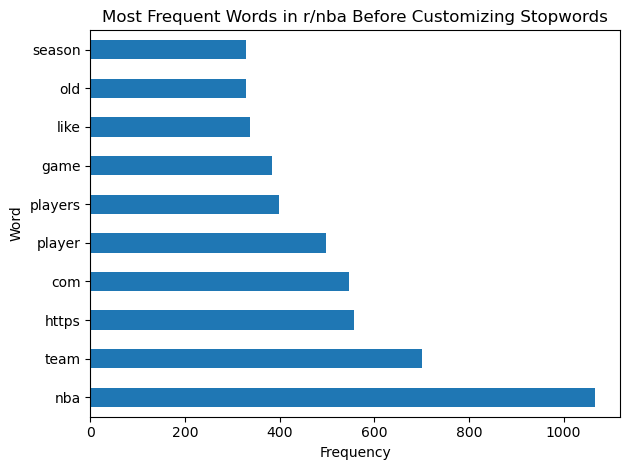

In [112]:
# plot top occuring words

X_train_nba_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Frequent Words in r/nba Before Customizing Stopwords');

plt.tight_layout()
plt.savefig('./../images/rnba_high_frequency_words_pre_stopword_cleaning.png');

### Count vectorizing on combined_nba_data with added stop words

In [66]:
# Setting up our X and y for combined_nba_df

nba_X2 = combined_nba_df['title_plus_selftext']
nba_y2 = combined_nba_df['subreddit']

In [67]:
# splitting our data into training and testing sets

X_train_nba2, X_test_nba2, y_train_nba2, y_test_nba2 = train_test_split(nba_X2, nba_y2, stratify = nba_y2, random_state= 42)

In [68]:
#Instantiating CountVectorizer

default_stop_words2 = CountVectorizer(stop_words='english').get_stop_words()

custom_stop_words2 = ['nba', 'com', 'https', 'like']

cvec_nba2_stop_words = list(default_stop_words2) + custom_stop_words2

cvec_nba2 = CountVectorizer(stop_words= cvec_nba2_stop_words)

In [69]:
# Fitting the vectorizer on my corpus

cvec_nba2.fit(X_train_nba2)

CountVectorizer(stop_words=['she', 'with', 'you', 'otherwise', 'they', 'almost',
                            'whence', 'although', 'get', 'nevertheless',
                            'alone', 'eleven', 'both', 'indeed', 'every', 'had',
                            'that', 'whereafter', 'first', 'already', 'through',
                            'yet', 'put', 'others', 'ten', 'whoever', 'often',
                            'while', 'will', 'whose', ...])

In [70]:
# Transforming our corpus

X_train_nba2 = cvec_nba2.transform(X_train_nba2)

In [71]:
# checking the shape of our transformed corpus

X_train_nba2.shape

(1065, 9834)

In [72]:
# convert training data to dataframe

X_train_nba_df2 = pd.DataFrame(X_train_nba2.todense(), 
                          columns=cvec_nba2.get_feature_names_out())

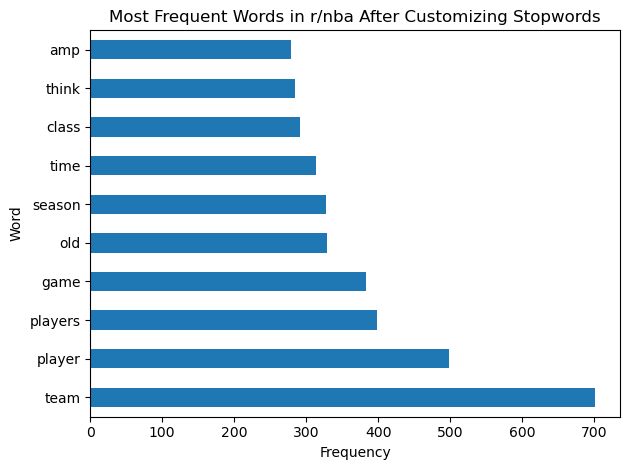

In [113]:
# plot top occuring words

X_train_nba_df2.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Frequent Words in r/nba After Customizing Stopwords');

plt.tight_layout()
plt.savefig('./../images/rnba_high_frequency_words_post_stopword_cleaning.png');

Even after adding in additional stop words to the count vectorizers on both the NFL and NBA dataframes, I still feel that the top occuring words are not very indicative of the subreddits they came from. 

Below, I decided to utilize bi-grams to see if those will produce better results when it comes to more a hopeful indication of the correct subreddit.

____________________________
## Bi-Grams

### NFL Subreddit

In [74]:
# Setting up our X and y for combined_nfl_df

ngrams_nfl_X = combined_nfl_df['title_plus_selftext']
ngrams_nfl_y = combined_nfl_df['subreddit']

In [75]:
# Checking our baseline

ngrams_nfl_y.value_counts(normalize= True)

nfl    1.0
Name: subreddit, dtype: float64

In [76]:
# splitting our data into training and testing sets

ngrams_X_train_nfl, ngrams_X_test_nfl, ngrams_y_train_nfl, ngrams_y_test_nfl = train_test_split(ngrams_nfl_X, ngrams_nfl_y, stratify = ngrams_nfl_y, random_state= 42)

In [77]:
#Instantiating CountVectorizer looking for bi-grams with multitude of stop words, in addition to `english`

default_stop_words = CountVectorizer(stop_words='english').get_stop_words()

custom_stop_words = ['like', 'nfl', 'https', 'amp', 'www', 'reddit', 'com', 'utm_source', 'utm_medium', 'web2x']

ngram_stop_words = list(default_stop_words) + custom_stop_words

cvec_nfl_ngrams = CountVectorizer(ngram_range= (2,2), stop_words= ngram_stop_words)

In [78]:
# Fitting the vectorizer on my corpus

cvec_nfl_ngrams.fit(ngrams_X_train_nfl)

CountVectorizer(ngram_range=(2, 2),
                stop_words=['she', 'with', 'you', 'otherwise', 'they', 'almost',
                            'whence', 'although', 'get', 'nevertheless',
                            'alone', 'eleven', 'both', 'indeed', 'every', 'had',
                            'that', 'whereafter', 'first', 'already', 'through',
                            'yet', 'put', 'others', 'ten', 'whoever', 'often',
                            'while', 'will', 'whose', ...])

In [79]:
# Transforming our corpus

ngrams_X_train_nfl = cvec_nfl_ngrams.fit_transform(ngrams_X_train_nfl)

In [80]:
# checking the shape of our transformed corpus

ngrams_X_train_nfl.shape

(954, 36863)

In [81]:
# convert training data to dataframe

ngrams_X_train_nfl_df = pd.DataFrame(ngrams_X_train_nfl.todense(), 
                          columns=cvec_nfl_ngrams.get_feature_names_out())

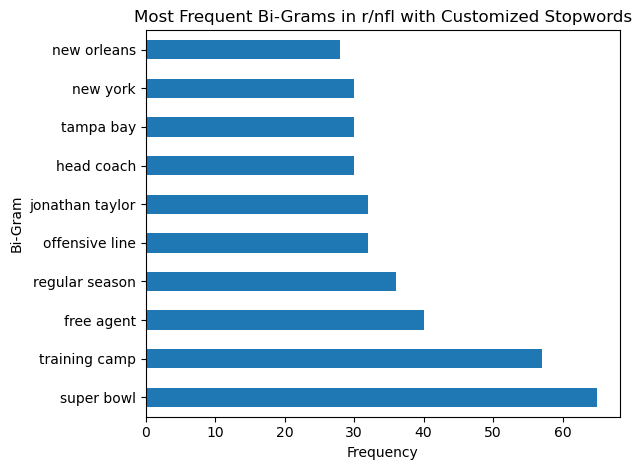

In [117]:
# plot top occuring bi-grams

ngrams_X_train_nfl_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

plt.xlabel('Frequency')
plt.ylabel('Bi-Gram')
plt.title('Most Frequent Bi-Grams in r/nfl with Customized Stopwords');

plt.tight_layout()
plt.savefig('./../images/rnfl_high_frequency_bigrams_with_stopword_cleaning.png');

### NBA Subreddit

In [83]:
# Setting up our X and y for combined_nba_df

ngrams_nba_X = combined_nba_df['title_plus_selftext']
ngrams_nba_y = combined_nba_df['subreddit']

In [84]:
# Checking our baseline

ngrams_nba_y.value_counts(normalize= True)

nba    1.0
Name: subreddit, dtype: float64

In [85]:
# splitting our data into training and testing sets

ngrams_X_train_nba, ngrams_X_test_nba, ngrams_y_train_nba, ngrams_y_test_nba = train_test_split(ngrams_nba_X, ngrams_nba_y, stratify = ngrams_nba_y, random_state= 42)

In [86]:
#Instantiating CountVectorizer looking for bi-grams with multitude of stop words, in addition to `english`

default_stop_words2 = CountVectorizer(stop_words='english').get_stop_words()

custom_stop_words2 = ['nba', 'com', 'https', 'like', 'reddit', 'amp', 'comments']

ngram_stop_words_nba = list(default_stop_words2) + custom_stop_words2

cvec_nba_ngrams = CountVectorizer(ngram_range= (2,2), stop_words= ngram_stop_words_nba)

In [87]:
# Fitting the vectorizer on my corpus

cvec_nba_ngrams.fit(ngrams_X_train_nba)

CountVectorizer(ngram_range=(2, 2),
                stop_words=['she', 'with', 'you', 'otherwise', 'they', 'almost',
                            'whence', 'although', 'get', 'nevertheless',
                            'alone', 'eleven', 'both', 'indeed', 'every', 'had',
                            'that', 'whereafter', 'first', 'already', 'through',
                            'yet', 'put', 'others', 'ten', 'whoever', 'often',
                            'while', 'will', 'whose', ...])

In [88]:
# Transforming our corpus

ngrams_X_train_nba = cvec_nba_ngrams.fit_transform(ngrams_X_train_nba)

In [89]:
# checking the shape of our transformed corpus

ngrams_X_train_nba.shape

(1065, 47447)

In [90]:
# convert training data to dataframe

ngrams_X_train_nba_df = pd.DataFrame(ngrams_X_train_nba.todense(), 
                          columns=cvec_nba_ngrams.get_feature_names_out())

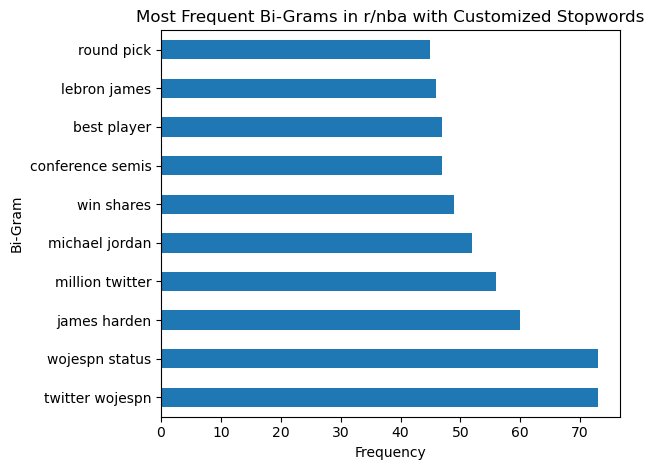

In [115]:
# plot top occuring bi-grams

ngrams_X_train_nba_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

plt.xlabel('Frequency')
plt.ylabel('Bi-Gram')
plt.title('Most Frequent Bi-Grams in r/nba with Customized Stopwords');

plt.tight_layout()
plt.savefig('./../images/rnba_high_frequency_bigrams_with_stopword_cleaning.png');

_____________________________________
## Concatenating both combined dataframes

Now that we have individually explored both dataframes for top occuring words and bi-grams, it is time to combine/concatenate the dataframes and explore the top occuring words and bi-grams in the total combined dataframe.

In [92]:
total_combined_dfs = pd.concat([combined_nfl_df, combined_nba_df], ignore_index = True)

In [93]:
total_combined_dfs.head()

,title,subreddit,selftext,subreddit_id,text_length,word_count,title_plus_selftext
0,2023 Offseason Review: Minnesota Vikings,nfl,# [Series Hub](https://www.reddit.com/r/nfl/co...,t5_2qmg3,12954,1676,2023 Offseason Review: Minnesota Vikings# [Ser...
1,2023 Offseason Review: San Francisco 49ers,nfl,#San Francisco 49ers Offseason Review\n\n##[Se...,t5_2qmg3,39725,6053,2023 Offseason Review: San Francisco 49ers#San...
2,Tua Tagovailoa says everything he did this off...,nfl,&gt;Tagovailoa also talked about choosing a ne...,t5_2qmg3,249,43,Tua Tagovailoa says everything he did this off...
3,[Glaser] “Zach Wilson has played really well i...,nfl,,t5_2qmg3,0,1,[Glaser] “Zach Wilson has played really well i...
4,[JacobWestendorf] #Broncos RB Terrell Davis pl...,nfl,,t5_2qmg3,0,1,[JacobWestendorf] #Broncos RB Terrell Davis pl...


In [94]:
total_combined_dfs.shape

(2692, 7)

In [95]:
total_combined_dfs['subreddit'].value_counts()

nba    1420
nfl    1272
Name: subreddit, dtype: int64

In [96]:
total_combined_dfs.isnull().sum()

title                  0
subreddit              0
selftext               0
subreddit_id           0
text_length            0
word_count             0
title_plus_selftext    0
dtype: int64

### saving total_combined_dfs

In [98]:
total_combined_dfs.to_csv('./../data/total_combined_dfs.csv', index = False)

## N-grams for total_combined_dfs

In [99]:
# Setting up our X and y for total_combined_dfs

ngrams_total_X = total_combined_dfs['title_plus_selftext']
ngrams_total_y = total_combined_dfs['subreddit']

In [100]:
# splitting our data into training and testing sets

ngrams_X_train_total, ngrams_X_test_total, ngrams_y_train_total, ngrams_y_test_total = train_test_split(ngrams_total_X, ngrams_total_y, stratify = ngrams_total_y, random_state= 42)

In [101]:
#Instantiating CountVectorizer looking for bi-grams with multitude of stop words, in addition to `english`

default_stop_words3 = CountVectorizer(stop_words='english').get_stop_words()

custom_stop_words3 = ['nba', 'com', 'https', 'like', 'reddit', 'amp', 'comments', 'the', 'to', 'of', 'this', 'was', 'is', 'has', 'have', 'been', 'if', 'be', 'he', 'his', 'in']

ngram_stop_words_total = list(default_stop_words3) + custom_stop_words3

cvec_total_ngrams = CountVectorizer(ngram_range= (2,2), stop_words= custom_stop_words3, max_features=500, min_df=3, max_df=.95)

In [102]:
# Fitting the vectorizer on my corpus

cvec_total_ngrams.fit(ngrams_X_train_total)

CountVectorizer(max_df=0.95, max_features=500, min_df=3, ngram_range=(2, 2),
                stop_words=['nba', 'com', 'https', 'like', 'reddit', 'amp',
                            'comments', 'the', 'to', 'of', 'this', 'was', 'is',
                            'has', 'have', 'been', 'if', 'be', 'he', 'his',
                            'in'])

In [103]:
# Transforming our corpus

ngrams_X_train_total = cvec_total_ngrams.fit_transform(ngrams_X_train_total)

In [104]:
ngrams_X_train_total.shape

(2019, 500)

In [105]:
ngrams_X_train_total_df = pd.DataFrame(ngrams_X_train_total.todense(), 
                          columns=cvec_total_ngrams.get_feature_names_out())

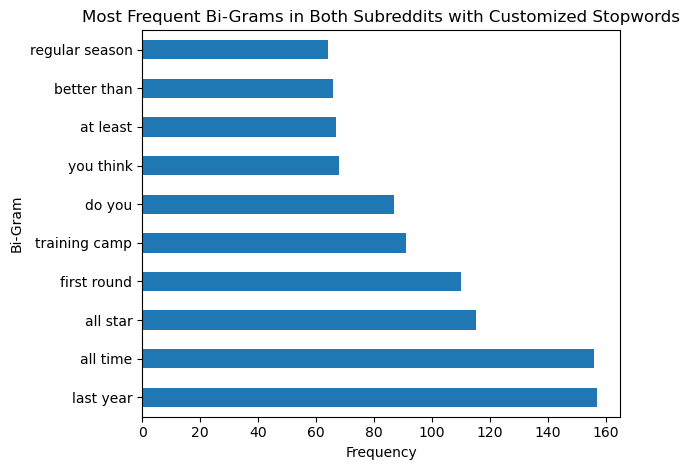

In [116]:
ngrams_X_train_total_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

plt.xlabel('Frequency')
plt.ylabel('Bi-Gram')
plt.title('Most Frequent Bi-Grams in Both Subreddits with Customized Stopwords');

plt.tight_layout()
plt.savefig('./../images/both_subreddits_high_frequency_bigrams_with_stopword_cleaning.png');

Although the top bi-grams outputted from the total_combined_dfs don't seem to be as indicative of the correct subreddit as the bi-grams outputted from the individual dataframes for NFL and NBA, there still seems to be some bi-grams (such as 'training camp' and 'all star') that should help our model perform better at determining the correct subreddit when new data is passed in. 

These findings from EDA will help me decide what parameters to use during the modeling phase.

Additionally, at this point, we have reached the second measure of success of my problem statement, being: "are we able to pull at least 5 clear topics from each subreddit dataframe using bi-grams, in order to help understand what topics might be good for upcoming segments on the show".